In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import uniform
from statsmodels.stats.multicomp import pairwise_tukeyhsd # For performing the Tukey-HSD test
from statsmodels.stats.multicomp import MultiComparison # To compare the levels of independent with the dependent variables

# PROBLEM 1

### Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

In [5]:
#reading the data
df=pd.read_csv('Zingaro_Company.csv')
df

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
...,...,...
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [8]:
df.isnull().sum()

Unpolished              0
Treated and Polished    0
dtype: int64

## Distribution of data set

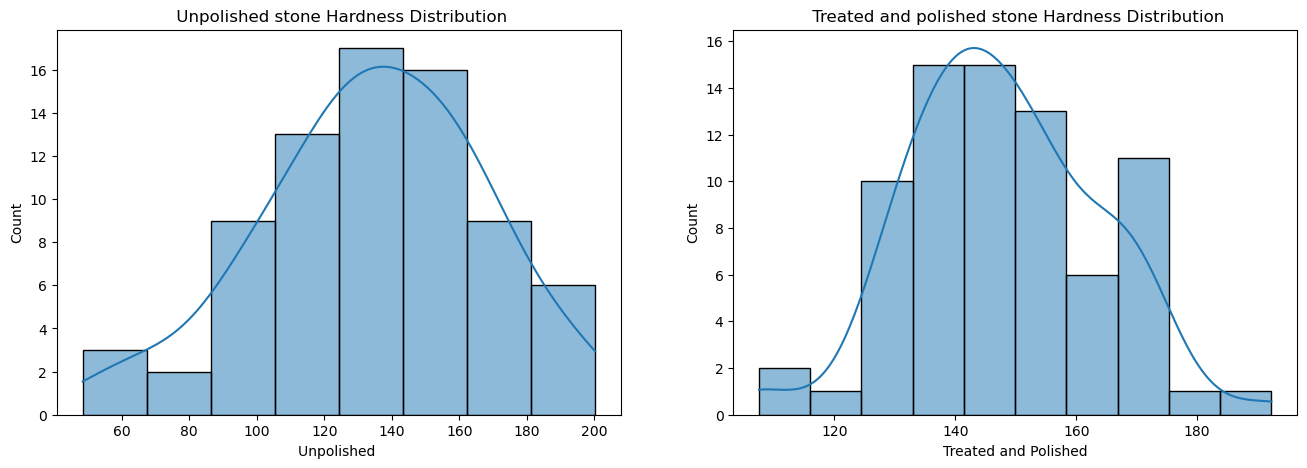

In [51]:
fig, axis = plt.subplots(1,2, figsize = (16,5))
sns.histplot(x=df['Unpolished '],kde=True,ax=axis[0])
sns.histplot(x=df['Treated and Polished'],kde=True,ax=axis[1])
axis[0].set_title(' Unpolished stone Hardness Distribution')
axis[1].set_title(' Treated and polished stone Hardness Distribution')
plt.show()

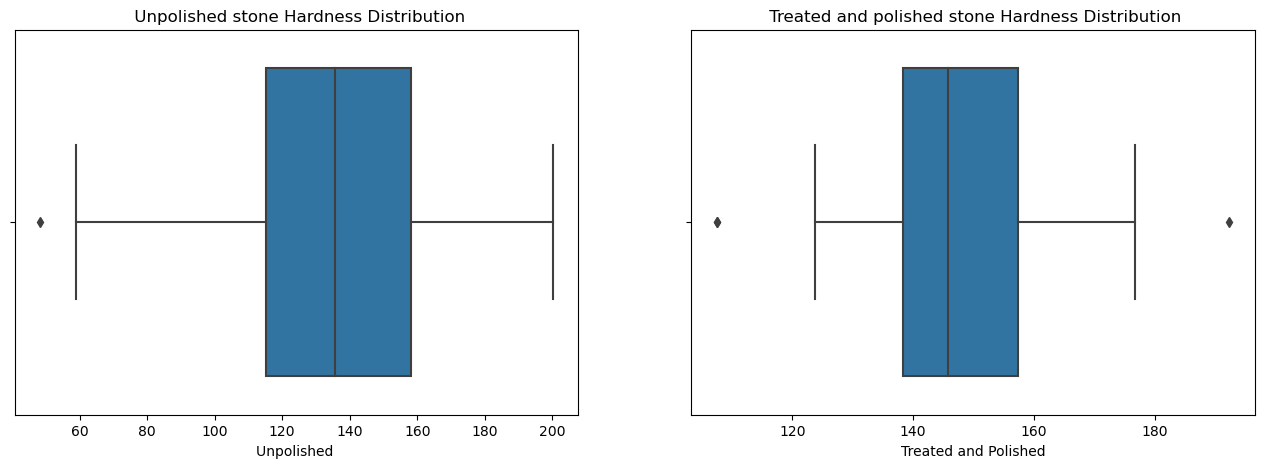

In [52]:
fig, axis = plt.subplots(1,2, figsize = (16,5))
sns.boxplot(x=df['Unpolished '],ax=axis[0])
sns.boxplot(x=df['Treated and Polished'],ax=axis[1])
axis[0].set_title(' Unpolished stone Hardness Distribution')
axis[1].set_title(' Treated and polished stone Hardness Distribution')
plt.show()

### 1.1 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [19]:
#DEFINING THE HYPOTHESIS
# H0: Brinell's hardness index >=150 for unpolished stones
#H1 : Brinell's hardness index <150 for unpolished stones

In [6]:
#Given Data:
mu=150
alpha=0.05

In [10]:
t_statistic,p_value=ttest_1samp(df['Unpolished '],mu,alternative='less')

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -4.164629601426757
p-value: 4.171286997419652e-05


### P<alpha, hence we reject null hypothesis.

 So Zingaro is right in thinking  that unpolished stones are not suitable for printing.

### 1.2 Is the mean hardness of the polished and unpolished stones the same?

In [11]:
#DEFINING THE HYPOTHESIS:
# H0: mean hardness of polished stone = mean hardness of unpolished stones
#H1 : mean hardness of polished stone != mean hardness of unpolished stones

In [9]:
#two-sample T-test
t_stat, p_value=stats.ttest_ind(df['Unpolished '],df['Treated and Polished'],alternative='two-sided')
print('t-statistic',t_stat)
print('P value',p_value)

t-statistic -3.2422320501414053
P value 0.0014655150194628353


###  P < alpha , hence we reject null hypothesis

So both means are not equal. At 95% Confidence Interval we could conclude that the samples’  i.e., The Hardness of unpolished stone and Hardness of Polished and Treated Stone is not same.

# PROBLEM 2

### Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%)

### Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly. 

In [51]:
#Reading the data:
df=pd.read_csv('Aquarius_gym.csv')
df

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44
...,...,...,...
95,96,16,18
96,97,19,28
97,98,24,28
98,99,14,24


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sr no.  100 non-null    int64
 1   Before  100 non-null    int64
 2   After   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [53]:
df.isnull().sum()

Sr no.    0
Before    0
After     0
dtype: int64

## Distribution of the dataset

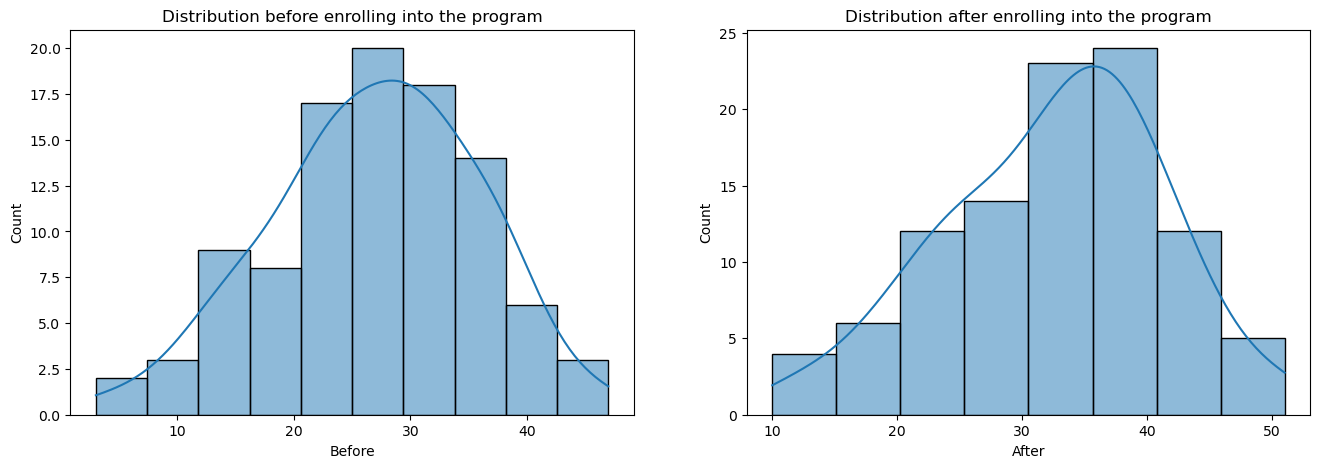

In [54]:
fig, axis = plt.subplots(1,2, figsize = (16,5))
sns.histplot(x=df['Before'],kde=True,ax=axis[0])
sns.histplot(x=df['After'],kde=True,ax=axis[1])
axis[0].set_title('Distribution before enrolling into the program')
axis[1].set_title('Distribution after enrolling into the program')
plt.show()

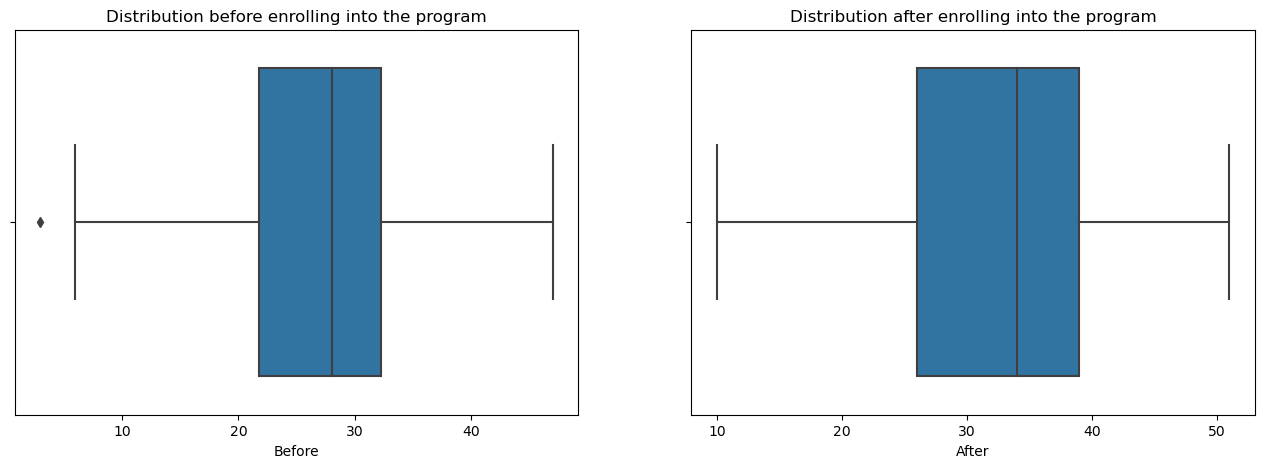

In [55]:
fig, axis = plt.subplots(1,2, figsize = (16,5))
sns.boxplot(x=df['Before'],ax=axis[0])
sns.boxplot(x=df['After'],ax=axis[1])
axis[0].set_title('Distribution before enrolling into the program')
axis[1].set_title('Distribution after enrolling into the program')
plt.show()

In [15]:
#DEFINING THE HYPOTHESIS:
#H0: mean before=mean after
#H1 : mean before != mean after

In [15]:
#GIVEN DATA:
alpha=0.05

In [19]:
#Paired T-test
t_stat, p_value=stats.ttest_rel(df['Before'],df['After'])
print('Test statistic',t_stat)
print('P value',p_value)

Test statistic -19.322619811082458
P value 2.2920419252511966e-35


### P<alpha, hence we reject null hypothesis.

So there is some difference before and after the programme indicating the programme is effective

#### To look at how effective the programme is, we need to check if the mean difference in pushups us less than or greater than 5 


In [ ]:
#DEFINING THE HYPOTHESIS:
#H0: mean difference <= 5
#H1 : mean difference > 5

In [16]:
df['Difference'] = df['After'] - df['Before']
df

,Sr no.,Before,After,Difference
0,1,39,44,5
1,2,25,25,0
2,3,39,39,0
3,4,6,13,7
4,5,40,44,4
...,...,...,...,...
95,96,16,18,2
96,97,19,28,9
97,98,24,28,4
98,99,14,24,10


In [24]:
#1 sampled T-test
t_stat, p_value = ttest_1samp(df['Difference'], popmean=5, alternative='greater')
print ("t_stat is: ",t_stat)
print("p_value is: ",p_value)

t_stat is:  1.9148542155126753
p_value is:  0.029198872141011217


### P<alpha, hence we reject null hypothesis.
Thus the programme was effective in achieving a difference of 5 push-ups upon comparing before and after the programme



# PROBLEM 3

### Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.

In [29]:
#READING THE DATA:
df = pd.read_excel ("Dental Hardness data.xlsx",sheet_name='Data')
df

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792
...,...,...,...,...,...
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [31]:
df.isnull().sum()

Dentist     0
Method      0
Alloy       0
Temp        0
Response    0
dtype: int64

In [32]:
df_1=df.query('Alloy==1')
df_2=df.query('Alloy==2')

#### The Shapiro-Wilk test

In [33]:
# The Shapiro-Wilk test is performed to test if the given data is normally distributed or not
#H0 - Data is normally distributed
#H1- Data is not normally distributed


In [34]:
stats_df_1=stats.shapiro(df_1.Response)
print("Shapiro result of alloy 1: ",stats_df_1)
stats_df_2=stats.shapiro(df_2.Response)
print("Shapiro result of alloy 2: ",stats_df_2)

Shapiro result of alloy 1:  ShapiroResult(statistic=0.8304629921913147, pvalue=1.1945070582441986e-05)
Shapiro result of alloy 2:  ShapiroResult(statistic=0.887769341468811, pvalue=0.00040293222991749644)


### Since P< alpha hence we reject null hypothesis
Both alloy1 and alloy2 are not normally distributed

Text(0.5, 1.0, ' Alloy2 Distribution')

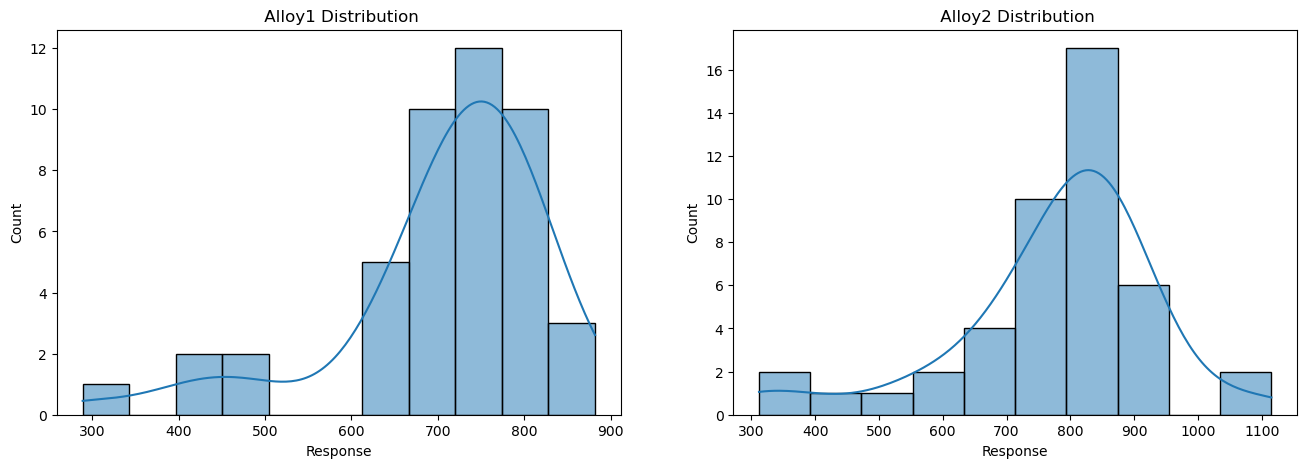

In [35]:
fig, axis = plt.subplots(1,2, figsize = (16,5))
#Plot of alloy1
sns.histplot(x='Response', kde=True, data=df_1,ax=axis[0])
axis[0].set_title(' Alloy1 Distribution')
#Plot of alloy1
sns.histplot(x='Response', kde=True, data=df_2,ax=axis[1])
axis[1].set_title(' Alloy2 Distribution')

#### The Levene test

In [36]:
# The Levene test tests the null hypothesis that all input samples are  from populations with equal variances
#H0 - The distribution have equal variances
#H1- The distribution do not have equal variances


In [42]:
df['Method'].unique()

array([1, 2, 3], dtype=int64)

In [39]:
#Response data for methods of alloy1
df_alloy1_method1= df_1.Response[df.Method == 1]
df_alloy1_method2= df_1.Response[df.Method == 2]
df_alloy1_method3= df_1.Response[df.Method == 3]
stats.levene(df_alloy1_method1,df_alloy1_method2,df_alloy1_method3)

LeveneResult(statistic=6.52140454403598, pvalue=0.0034160381460233975)

### Since Pvalue<alpha(0.05) hence we reject H0
So one of the methods in alloy1 has different variance

In [40]:
#Response data for methods of alloy2
df_alloy2_method1= df_2.Response[df.Method == 1]
df_alloy2_method2= df_2.Response[df.Method == 2]
df_alloy2_method3= df_2.Response[df.Method == 3]
stats.levene(df_alloy2_method1,df_alloy2_method2,df_alloy2_method3)

LeveneResult(statistic=3.349707184158617, pvalue=0.04469269939158668)

### Since Pvalue<alpha(0.05) hence we reject H0
So one of the methods in alloy2 has different variance

In [43]:
df['Dentist'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [44]:
# Response data for dentists of alloy1
df_alloy1_Dentist1= df_1.Response[df.Dentist == 1]
df_alloy1_Dentist2= df_1.Response[df.Dentist == 2]
df_alloy1_Dentist3= df_1.Response[df.Dentist == 3]
df_alloy1_Dentist4= df_1.Response[df.Dentist == 4]
df_alloy1_Dentist5= df_1.Response[df.Dentist == 5]
stats.levene(df_alloy1_Dentist1,df_alloy1_Dentist2,df_alloy1_Dentist3,df_alloy1_Dentist4,df_alloy1_Dentist5)

LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)

### Since Pvalue>alpha(0.05) hence we fail to reject H0
So all variances of Dentists are same in alloy1

In [45]:
# Response data for dentists of alloy2
df_alloy1_Dentist1= df_2.Response[df.Dentist == 1]
df_alloy1_Dentist2= df_2.Response[df.Dentist == 2]
df_alloy1_Dentist3= df_2.Response[df.Dentist == 3]
df_alloy1_Dentist4= df_2.Response[df.Dentist == 4]
df_alloy1_Dentist5= df_2.Response[df.Dentist == 5]
stats.levene(df_alloy1_Dentist1,df_alloy1_Dentist2,df_alloy1_Dentist3,df_alloy1_Dentist4,df_alloy1_Dentist5)

LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)

### Since Pvalue>alpha(0.05) hence we fail to reject H0
So all variances of Dentists are same in alloy2

In [46]:
df['Temp'].value_counts()

1500    30
1600    30
1700    30
Name: Temp, dtype: int64

In [48]:
# Response data for temp of alloy1
df_alloy1_Temp1= df_1.Response[df_1.Temp == 1500]
df_alloy1_Temp2= df_1.Response[df_1.Temp == 1600]
df_alloy1_Temp3= df_1.Response[df_1.Temp == 1700]
stats.levene(df_alloy1_Temp1,df_alloy1_Temp2,df_alloy1_Temp3)

LeveneResult(statistic=0.26470963952464094, pvalue=0.7686994896007937)

### Since Pvalue>alpha(0.05) hence we fail to reject H0
So all variances of Temp are same in alloy1

In [49]:
# Response data for temp of alloy1
df_alloy2_Temp1= df_2.Response[df_2.Temp == 1500]
df_alloy2_Temp2= df_2.Response[df_2.Temp == 1600]
df_alloy2_Temp3= df_2.Response[df_2.Temp == 1700]
stats.levene(df_alloy2_Temp1,df_alloy2_Temp2,df_alloy2_Temp3)

LeveneResult(statistic=0.6697956965974987, pvalue=0.5171946653062957)

### Since Pvalue>alpha(0.05) hence we fail to reject H0
So all variances of Temp are same in alloy2

### 3.1 Is there any difference among the dentists on the implant hardness?

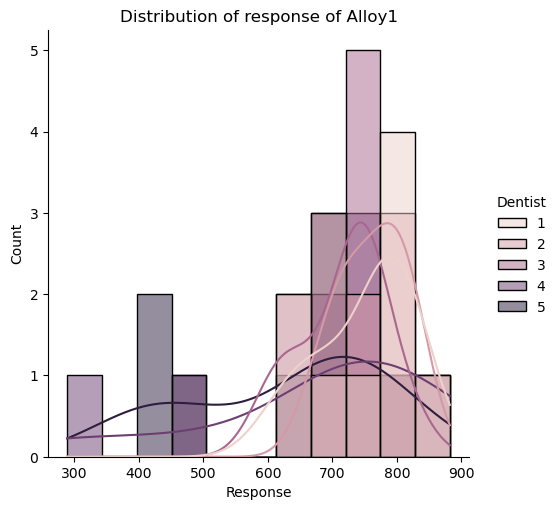

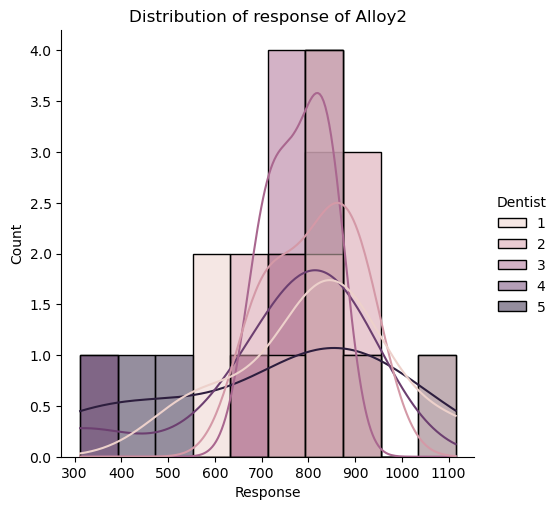

In [69]:
sns.displot(x=df_1['Response'], hue=df_1['Dentist'], kde=True)
plt.title('Distribution of response of Alloy1')
sns.displot(x=df_2['Response'], hue=df_2['Dentist'], kde=True)
plt.title('Distribution of response of Alloy2')
plt.show()

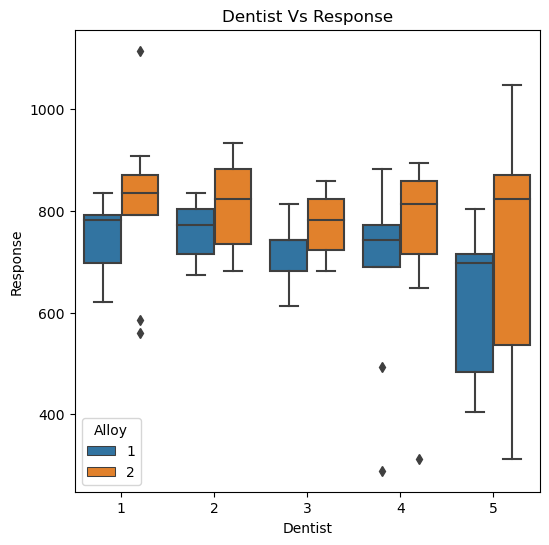

In [70]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df,x='Dentist',y='Response',hue='Alloy')
plt.title('Dentist Vs Response')
plt.show();

In [53]:
# for alloy1
#H0 - the implant hardness of alloy1 is same for all dentists
#H1- the implant hardness of alloy1 is not same for all dentists


In [54]:
formula1='Response ~ C(Dentist)'
model1=ols(formula1,df_1).fit()
aov_table1=anova_lm(model1)
print(aov_table1)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


#### So the P value > 0.05, thus we fail to reject null hypothesis
#### i.e- the implant hardness of alloy1 is same for all dentists

In [55]:
# for alloy2
#H0 - the implant hardness of alloy2 is same for all dentists
#H1- the implant hardness of alloy2 is not same for all dentists

In [56]:
formula2='Response ~ C(Dentist)'
model2=ols(formula2,df_2).fit()
aov_table2=anova_lm(model2)
print(aov_table2)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


#### So the P value > 0.05, thus we fail to reject null hypothesis
#### i.e- the implant hardness of alloy2 is same for all dentists

### 3.2 Is there any difference among the methods on the implant hardness?

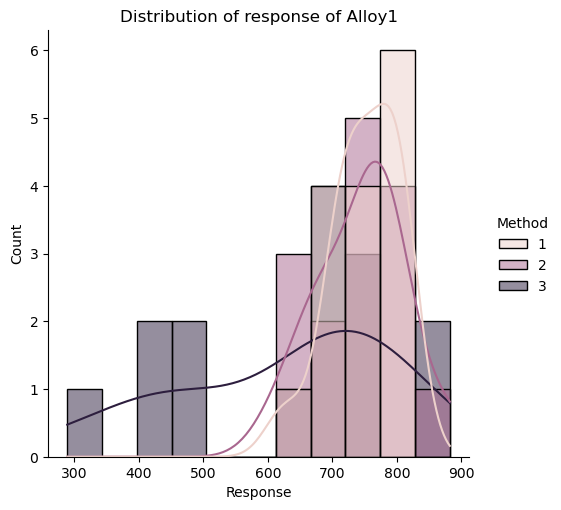

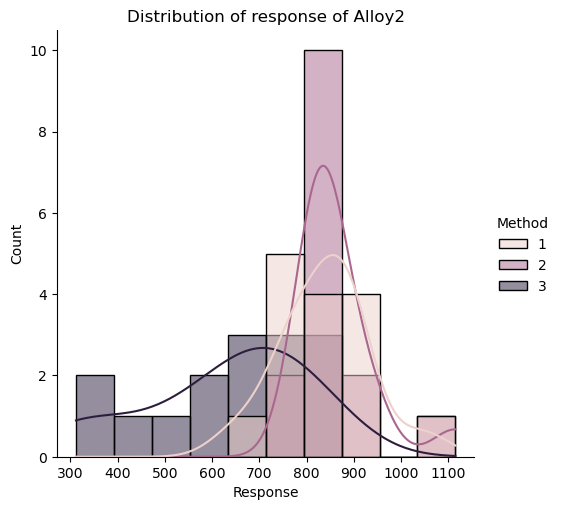

In [72]:
sns.displot(x=df_1['Response'], hue=df_1['Method'], kde=True)
plt.title('Distribution of response of Alloy1')
sns.displot(x=df_2['Response'], hue=df_2['Method'], kde=True)
plt.title('Distribution of response of Alloy2')
plt.show();

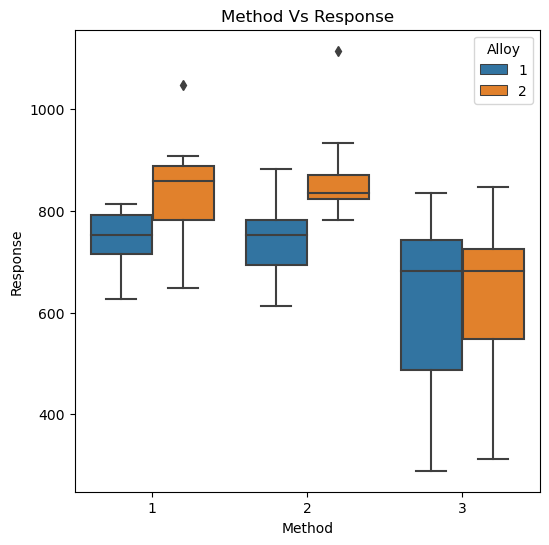

In [74]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df,x='Method',y='Response',hue='Alloy')
plt.title('Method Vs Response')
plt.show();

In [ ]:
# for alloy1
#H0 - the implant hardness of alloy1 is same for all methods
#H1- the implant hardness of alloy1 is not same for all methods

In [25]:
formula3='Response ~ C(Method)'
model3=ols(formula3,df_1).fit()
aov_table3=anova_lm(model3)
print(aov_table3)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [60]:
# Perform Tucky-HSD test to check which means are different
mcomp = MultiComparison(df_1.Response, df_1.Method)
print(mcomp.tukeyhsd().summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


In [ ]:
# for alloy2
#H0 - the implant hardness of alloy2 is same for all methods
#H1- the implant hardness of alloy2 is not same for all methods

In [23]:
formula4='Response ~ C(Method)'
model4=ols(formula4,df_2).fit()
aov_table4=anova_lm(model4)
print(aov_table4)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [61]:
# Perform Tucky-HSD test to check which means are different
mcomp = MultiComparison(df_2.Response, df_2.Method)
print(mcomp.tukeyhsd().summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


### 3.3 Is there any difference among the temperature levels on the implant hardness?

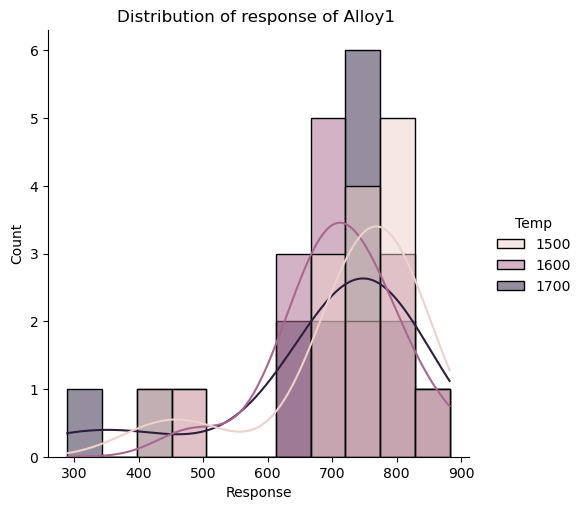

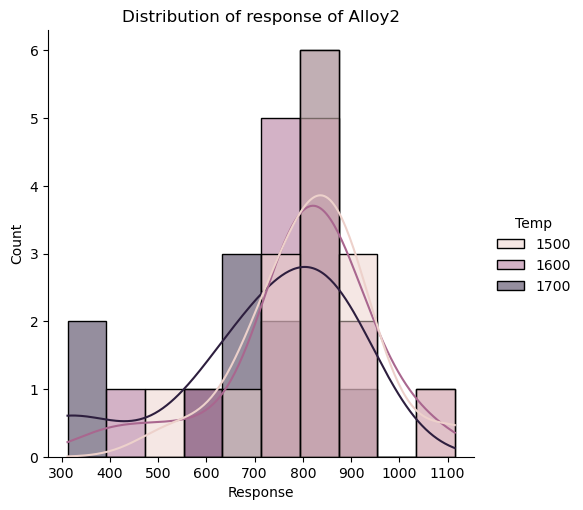

In [75]:
sns.displot(x=df_1['Response'], hue=df_1['Temp'], kde=True)
plt.title('Distribution of response of Alloy1 ')
sns.displot(x=df_2['Response'], hue=df_2['Temp'], kde=True)
plt.title('Distribution of response of Alloy2')
plt.show();

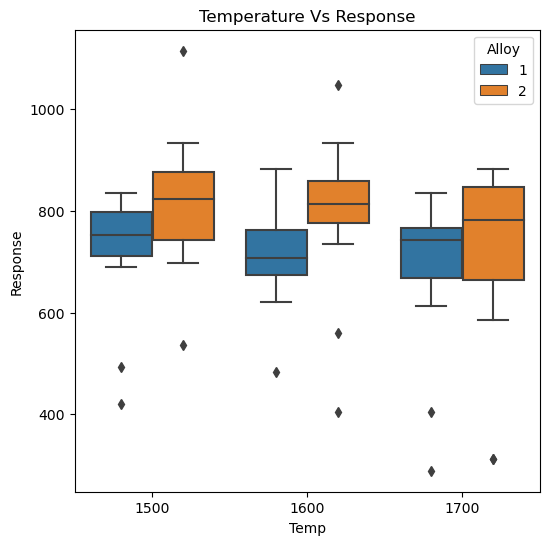

In [77]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df,x='Temp',y='Response',hue='Alloy')
plt.title('Temperature Vs Response')
plt.show();

In [ ]:
# for alloy1
#H0 - the implant hardness of alloy1 is same for all temps
#H1- the implant hardness of alloy1 is not same for all temps

In [27]:
formula5='Response ~ C(Temp)'
model5=ols(formula5,df_1).fit()
aov_table5=anova_lm(model5)
print(aov_table5)

            df         sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0   10154.444444   5077.222222  0.335224  0.717074
Residual  42.0  636122.800000  15145.780952       NaN       NaN


In [ ]:
# for alloy2
#H0 - the implant hardness of alloy2 is same for all temps
#H1- the implant hardness of alloy2 is not same for all temps

In [28]:
formula6='Response ~ C(Temp)'
model6=ols(formula6,df_2).fit()
aov_table6=anova_lm(model6)
print(aov_table6)

            df        sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0  9.374893e+04  46874.466667  1.883492  0.164678
Residual  42.0  1.045254e+06  24886.996825       NaN       NaN
